In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scanpy as sc
import anndata as an

In [2]:
def plot_theta(adata, theta, path, s=5):
    crd = adata.obsm["spatial"]
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.scatter(crd[:,1],crd[:,0],c = theta,s=s,edgecolor = "none")
    ax.set_aspect("equal")
    for sp in ax.spines.keys():
        ax.spines[sp].set_visible(False)       
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(path)

def create_object(counts_path, metrics_path):
    obs = pd.read_csv(counts_path, delimiter='\t')
    metrics = pd.read_csv(metrics_path, delimiter='\t')
    xy = obs['Unnamed: 0'].tolist()
    metrics["xy"] = metrics["x"].astype(str) + "x" + metrics["y"].astype(str)
    metrics = metrics.set_index('xy')
    metrics = metrics.reindex(index=obs['Unnamed: 0'])
    metrics = metrics.reset_index()
    pix_xy = metrics.loc[:, ['pixel_x', 'pixel_y']]
    spatial = pix_xy.values
    X = obs
    del X['Unnamed: 0']  
    adata = an.AnnData(X)
    adata.obsm['spatial'] = spatial
    return adata

def prepare_data(adata : an.AnnData, todense : bool = True, select_hvg : bool = True)-> an.AnnData:
    adata.var_names_make_unique()
    if todense:
        X = np.array(adata.X.todense())
        adata.X = X
    if select_hvg:
        sc.pp.log1p(adata)
        sc.pp.highly_variable_genes(adata, n_top_genes = 1000)
        adata = adata[:,adata.var.highly_variable.values]
        adata.X = (np.exp(adata.X) -1).round(0)
    return adata

## For BC-A

In [3]:
pathBC1 = "/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/human_breast_cancer_ST_data/"
adataA = sc.read_visium(pathBC1)
adataA = prepare_data(adataA)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
theta_df_A = pd.read_csv("BC1it2000-theta.tsv", delimiter='\t',)
del theta_df_A['Unnamed: 0']

In [7]:
theta_df_A

,0,1,2,3,4,5,6,7,8,9
0,0.185616,0.048630,0.048630,0.014384,0.007534,0.007534,0.144521,0.350000,0.028082,0.165068
1,0.060643,0.024498,0.751406,0.036546,0.016466,0.052610,0.016466,0.004418,0.008434,0.028514
2,0.190625,0.003125,0.190625,0.034375,0.003125,0.034375,0.159375,0.221875,0.159375,0.003125
3,0.050810,0.004251,0.034615,0.036640,0.010324,0.004251,0.081174,0.305870,0.014372,0.457692
4,0.275610,0.115331,0.303484,0.056098,0.122300,0.024739,0.017770,0.059582,0.017770,0.007317
...,...,...,...,...,...,...,...,...,...,...
3793,0.103846,0.129487,0.180769,0.193590,0.116667,0.103846,0.039744,0.078205,0.026923,0.026923
3794,0.165979,0.114433,0.289691,0.021649,0.135052,0.021649,0.021649,0.093814,0.093814,0.042268
3795,0.012500,0.077976,0.625595,0.125595,0.000595,0.066071,0.012500,0.030357,0.030357,0.018452
3796,0.472143,0.065000,0.057857,0.050714,0.000714,0.000714,0.065000,0.036429,0.072143,0.179286


In [8]:
thetaA = theta_df_A.to_numpy()

In [9]:
pca = PCA(n_components=3)

In [10]:
theta_red_A = pca.fit_transform(thetaA)

In [11]:
theta_red_A

array([[-0.06280909,  0.28456595,  0.03158239],
       [ 0.61069059, -0.01287447, -0.24049437],
       [ 0.05216306,  0.1716384 , -0.08053062],
       ...,
       [ 0.47972696, -0.08973672, -0.19441692],
       [-0.03346209,  0.26670265,  0.04617785],
       [-0.10680329, -0.12599721, -0.01931488]])

In [12]:
smallest = np.min(theta_red_A)
largest = np.max(theta_red_A)
theta_red_normalized = (theta_red_A - smallest) / (largest - smallest)

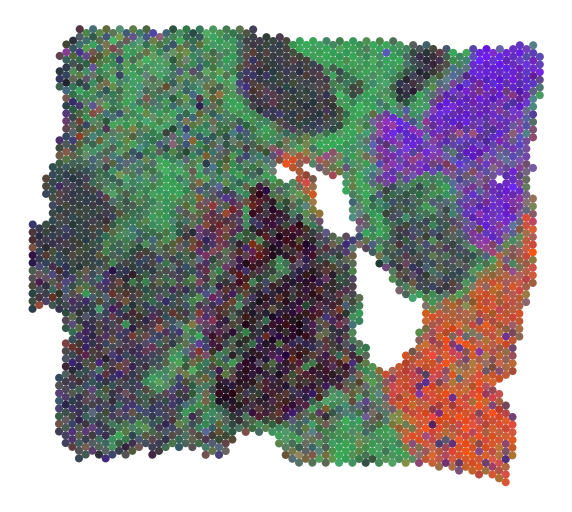

In [13]:
path = "/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/Figures/Fig3/A.png"
plot_theta(adataA, theta_red_normalized, path, s = 65)

## For BC-B

In [19]:
counts_path = "/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/her2st_G2/G2.tsv"
metrics_path = "/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/her2st_G2/G2_selection.tsv"
adataB = create_object(counts_path, metrics_path)
adataB = prepare_data(adataB, todense = False)

/Users/juliafoyer/opt/anaconda3/envs/isbad2/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


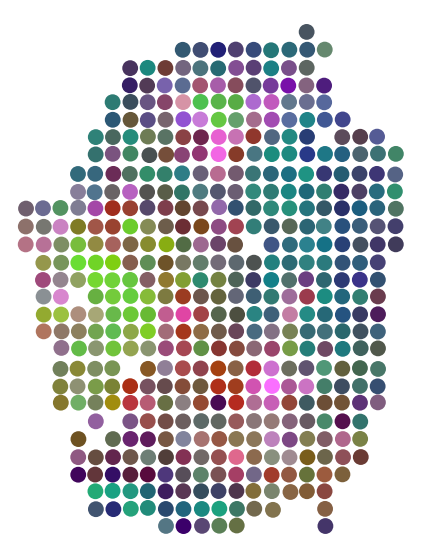

In [21]:
theta_df_B = pd.read_csv("BC2it2000-theta.tsv", delimiter='\t',)
del theta_df_B['Unnamed: 0']
thetaB = theta_df_B.to_numpy()
theta_red_B = pca.fit_transform(thetaB)
smallest = np.min(theta_red_B)
largest = np.max(theta_red_B)
theta_red_normalized = (theta_red_B - smallest) / (largest - smallest)
path = "/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/Figures/Fig3/B.png"
plot_theta(adataB, theta_red_normalized, path, s = 250)

## Plot single factor over image

### For BC-A

In [14]:
adataA

View of AnnData object with n_obs × n_vars = 3798 × 1000
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'

In [81]:
adataA.uns

OverloadedDict, wrapping:
	{'spatial': {'V1_Breast_Cancer_Block_A_Section_1': {'images': {'hires': array([[[0.7411765 , 0.7490196 , 0.7372549 ],
        [0.74509805, 0.7529412 , 0.7372549 ],
        [0.7411765 , 0.7490196 , 0.7411765 ],
        ...,
        [0.7490196 , 0.7529412 , 0.7372549 ],
        [0.7411765 , 0.7490196 , 0.7294118 ],
        [0.74509805, 0.75686276, 0.7411765 ]],

       [[0.74509805, 0.7490196 , 0.7372549 ],
        [0.7411765 , 0.7529412 , 0.7372549 ],
        [0.74509805, 0.7529412 , 0.7372549 ],
        ...,
        [0.7490196 , 0.7529412 , 0.7372549 ],
        [0.7411765 , 0.7490196 , 0.7372549 ],
        [0.74509805, 0.75686276, 0.7372549 ]],

       [[0.74509805, 0.7529412 , 0.7372549 ],
        [0.74509805, 0.7529412 , 0.7372549 ],
        [0.74509805, 0.7529412 , 0.7372549 ],
        ...,
        [0.7490196 , 0.7529412 , 0.7372549 ],
        [0.7490196 , 0.7529412 , 0.7372549 ],
        [0.74509805, 0.7529412 , 0.7411765 ]],

       ...,

       [[0.7411

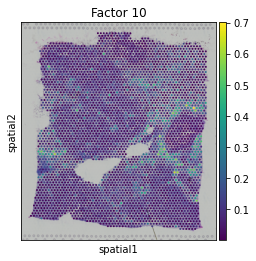

In [176]:
factor = 9
adataA.obs['theta'] = thetaA[:,factor]
sc.pl.spatial(adataA, img_key="hires", color=['theta'], title = "Factor {}".format(factor + 1))

In [96]:
thetaA_df.shape

(3798, 10)

In [138]:
adataA.obs

,in_tissue,array_row,array_col,theta,factor 0,factor 1,factor 2,factor 3,factor 4,factor 5,...,factor 1,factor 2,factor 3,factor 4,factor 5,factor 6,factor 7,factor 8,factor 9,factor 10
AAACAAGTATCTCCCA-1,1,50,102,0.165068,0.185616,0.048630,0.048630,0.014384,0.007534,0.007534,...,0.185616,0.048630,0.048630,0.014384,0.007534,0.007534,0.144521,0.350000,0.028082,0.165068
AAACACCAATAACTGC-1,1,59,19,0.028514,0.060643,0.024498,0.751406,0.036546,0.016466,0.052610,...,0.060643,0.024498,0.751406,0.036546,0.016466,0.052610,0.016466,0.004418,0.008434,0.028514
AAACAGAGCGACTCCT-1,1,14,94,0.003125,0.190625,0.003125,0.190625,0.034375,0.003125,0.034375,...,0.190625,0.003125,0.190625,0.034375,0.003125,0.034375,0.159375,0.221875,0.159375,0.003125
AAACAGGGTCTATATT-1,1,47,13,0.457692,0.050810,0.004251,0.034615,0.036640,0.010324,0.004251,...,0.050810,0.004251,0.034615,0.036640,0.010324,0.004251,0.081174,0.305870,0.014372,0.457692
AAACAGTGTTCCTGGG-1,1,73,43,0.007317,0.275610,0.115331,0.303484,0.056098,0.122300,0.024739,...,0.275610,0.115331,0.303484,0.056098,0.122300,0.024739,0.017770,0.059582,0.017770,0.007317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,0.026923,0.103846,0.129487,0.180769,0.193590,0.116667,0.103846,...,0.103846,0.129487,0.180769,0.193590,0.116667,0.103846,0.039744,0.078205,0.026923,0.026923
TTGTTTCACATCCAGG-1,1,58,42,0.042268,0.165979,0.114433,0.289691,0.021649,0.135052,0.021649,...,0.165979,0.114433,0.289691,0.021649,0.135052,0.021649,0.021649,0.093814,0.093814,0.042268
TTGTTTCATTAGTCTA-1,1,60,30,0.018452,0.012500,0.077976,0.625595,0.125595,0.000595,0.066071,...,0.012500,0.077976,0.625595,0.125595,0.000595,0.066071,0.012500,0.030357,0.030357,0.018452
TTGTTTCCATACAACT-1,1,45,27,0.179286,0.472143,0.065000,0.057857,0.050714,0.000714,0.000714,...,0.472143,0.065000,0.057857,0.050714,0.000714,0.000714,0.065000,0.036429,0.072143,0.179286


In [139]:
colnames = [f"factor {k+1}" for k in range(thetaA.shape[1])]
#thetaA_df = pd.DataFrame(thetaA,columns = colnames,index = adataA.obs.index)
#adataA.obs = pd.concat((adataA.obs,thetaA_df),axis=1)

### For BC-B

In [25]:
adataB

AnnData object with n_obs × n_vars = 467 × 1000
    obs: 'theta'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'spatial'

In [118]:
adataA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]

{'images': {'hires': array([[[0.7411765 , 0.7490196 , 0.7372549 ],
          [0.74509805, 0.7529412 , 0.7372549 ],
          [0.7411765 , 0.7490196 , 0.7411765 ],
          ...,
          [0.7490196 , 0.7529412 , 0.7372549 ],
          [0.7411765 , 0.7490196 , 0.7294118 ],
          [0.74509805, 0.75686276, 0.7411765 ]],
  
         [[0.74509805, 0.7490196 , 0.7372549 ],
          [0.7411765 , 0.7529412 , 0.7372549 ],
          [0.74509805, 0.7529412 , 0.7372549 ],
          ...,
          [0.7490196 , 0.7529412 , 0.7372549 ],
          [0.7411765 , 0.7490196 , 0.7372549 ],
          [0.74509805, 0.75686276, 0.7372549 ]],
  
         [[0.74509805, 0.7529412 , 0.7372549 ],
          [0.74509805, 0.7529412 , 0.7372549 ],
          [0.74509805, 0.7529412 , 0.7372549 ],
          ...,
          [0.7490196 , 0.7529412 , 0.7372549 ],
          [0.7490196 , 0.7529412 , 0.7372549 ],
          [0.74509805, 0.7529412 , 0.7411765 ]],
  
         ...,
  
         [[0.7411765 , 0.7490196 , 0.741176

In [123]:
adataA.uns["spatial"].keys()

dict_keys(['V1_Breast_Cancer_Block_A_Section_1'])

In [127]:
adataA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["scalefactors"].keys()

dict_keys(['spot_diameter_fullres', 'tissue_hires_scalef', 'fiducial_diameter_fullres', 'tissue_lowres_scalef'])

In [134]:
from PIL import Image
image_path = "/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/her2st_G2/HE_BT23903_C2a.jpg"
img = Image.open(image_path)
img = np.asarray(img)
scalef = {'spot_diameter_fullres':200,
          'tissue_hires_scalef':1,
          'fiducial_diameter_fullres':1,
          'tissue_lowres_scalef':1}

adataB.uns["spatial"] = dict(patientG = dict(images = dict(hires = img),
                                             scalefactors = scalef ))

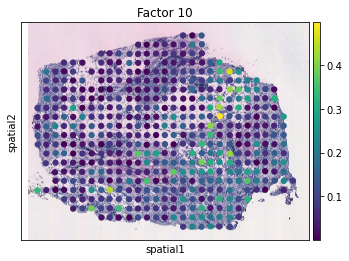

In [154]:
factor = 9
adataB.obs['theta'] = thetaB[:,factor]
sc.pl.spatial(adataB, color=['theta'], spot_size=200, title = "Factor {}".format(factor +1))